# Kohärente Abtastung (adv) und DFT von CT - Signalen zum Kapitel "DFT"

ToDos:
 - Manuelle Einstellung von N, L funktioniert noch nicht


In [17]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
figsize = {"figsize": (12,6), "facecolor":"w"}

In [22]:
#BASE_DIR = "/home/muenker/Daten/HM/dsvFPGA/Vorlesung/2016ss/nologo/img/"
FILENAME = "DFT_coherent" 
FMT = ".svg"

# This Greatest Common FRACTION function also works with fractions
def gcf(a, b):
    while b != 0:
        a, b = b, a % b # a = b, then b = a % b (remainder)
    return a

# Return min / max of an array a, expanded by eps*(max(a) - min(a))
def lim_eps(a,eps):
    mylim = (min(a) -(max(a) - min(a))*eps, max(a) + (max(a)-min(a))*eps)
    return mylim

#Initialize variables
#------------------------------------------------
fs = 210.0    # sampling frequency
Ts = 1.0/fs      # sampling period
N_man  = 0 # 100     # manual selection of N if N_man > 0
L_man = 0 #2 # manual selection of L if L_man > 0

fsig = 50.0    # base signal frequency
fsig2 = 60.0  # additional harmonic or component
DC   = 0    # DC-level (offset for cos-Signal)
A1   = 0.5   # Amplitude
A2   = 0.0
phi1 = -np.pi/2 + 0.01 # starting phase
phi2 = 0.0
#-------------------------------------------------
tstep = 1.0/(fsig*50) # time step for plotting "analog" signal

N = Nmax = int(fs / gcf(fs,fsig)) # Number of samples in one "digital" period
L = Lmax = int(fsig / gcf(fs,fsig)) # Number of "analog" periods
print('N =',N)
print('gcf(fs,fsig) = ', gcf(fs,fsig))
print('L =', L)
disp_L = True # highlight periodicity of anlog signal if possible
if N_man > 0:
    N = N_man
    L = int(fs/fsig)
if L_man > 0:
    L = L_per = L_man
    disp_L = False
elif L > 20: # Too many periods for analog plot
    L = L_per = 10
    N = int(L / (fsig * Ts))
    disp_L = 'false'
else:
   L_per = L+1  # display number of periods of analog signal

Tmax = L_per/fsig # calculate timespan from L_per
N_Ts = Tmax / Ts # number of samples in Tmax
#------------------------------------------------
# numpy.arange(start,stop,step): create linear spaced arrays (vectors)
# alternative: numpy.linspace(start,stop,numsteps,endpoint=true)
t = np.arange(0,Tmax,tstep) # "analog" time
n = np.arange(0,int(N_Ts),1) # discrete number of samples
# "Analoges" Signal:
xt = DC + A1 * np.cos(2.0*np.pi*fsig*t + phi1) + A2 * np.cos(2.0*np.pi*fsig2*t + phi2)
# Abgetastetes Signal
xn = DC + A1 * np.cos(2.0*np.pi*fsig*n*Ts + phi1) + A2 * np.cos(2.0*np.pi*fsig2*n*Ts + phi2)
#
# Versuchen Sie auch mal die hier (paarweise auskommentieren):
#
xt = DC + A1 * np.sign(np.cos(2.0*np.pi*fsig*t + phi1)) # rect function
xn = DC + A1 * np.sign(np.cos(2.0*np.pi*fsig*n*Ts + phi1)) # rect function

N = 21
gcf(fs,fsig) =  10.0
L = 5


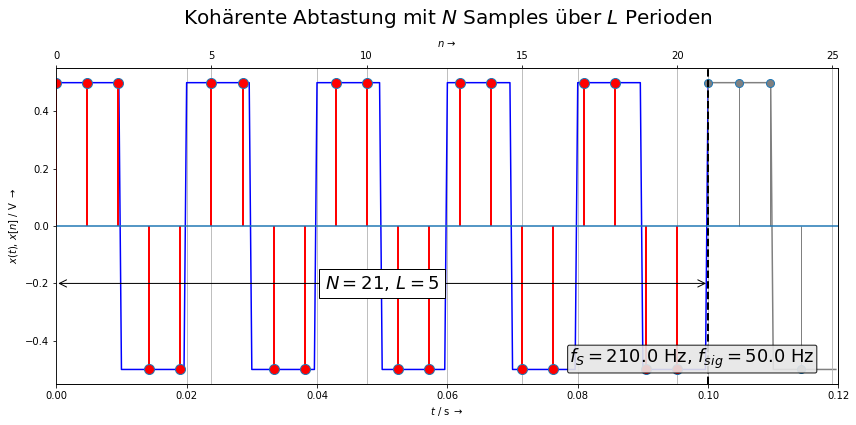

In [23]:
fig1,ax1 = plt.subplots(1, **figsize)
# Plotte x über L Perioden mit blauer Linie
ax1.plot(t[0:L*50+1], xt[0:L*50+1], 'b-', label = '$x(t)$')
ax1.plot(t[L*50:], xt[L*50:], color='grey', linestyle='-')   # plot rest of x
ax1.set_xlabel(r'$t$ / s $\rightarrow$')
ax1.set_ylabel(r'$x(t), \, x[n]$ / V $\rightarrow$')
grid(axis='x') # y-gridlines für beide x-Achsen
ax1.set_xlim([0,Tmax])
ax2 = ax1.twiny() # Zwei Plots mit gemeinsamer y- aber verschiedenen x-Achsen
markerline, stemlines, baseline = ax2.stem(n[0:N], xn[0:N], label = '$x[n]$', use_line_collection=True)
plt.setp(markerline, 'markerfacecolor', 'r', 'markersize', 10)
plt.setp(stemlines, 'color','r', 'linewidth', 2)
plt.setp(baseline, 'linewidth', 0) # turn off baseline
if disp_L==True:
    markerline, stemlines, baseline = ax2.stem(n[N:], xn[N:], use_line_collection=True)
    plt.setp(markerline, 'markerfacecolor', 'grey', 'markersize', 8)
    plt.setp(stemlines, 'color','grey', 'linewidth', 1, linestyle='-')
    plt.setp(baseline, 'linewidth', 0) # turn off baseline
ax2.set_xlabel(r'$n \, \rightarrow$')
ax2.grid(True) # x-Gitterlinien für zweite x-Achse
ax2.set_xlim([0,N_Ts]) # Anpassen des Bereichs für zweite x-Achse an erste
ylbl = min(xt) + (max(xt) - min(xt)) * 0.3 # position for label
ax2.text(0.97, 0.04, '$f_S = %.1f$ Hz, $f_{sig} = %.1f$ Hz' %(fs,fsig),
         fontsize=18, ha="right", va="bottom",linespacing=1.5,
         transform = ax2.transAxes, # coordinates relativ to axis
         bbox=dict(alpha=0.9,boxstyle="round,pad=0.1", fc='0.9'))
if disp_L==True:
    # double-headed arrow for period length using annotate command with empty text:
    ax2.annotate('', (0, ylbl),(N, ylbl), xycoords='data', ha="center", va="center", size=18,
        arrowprops=dict(arrowstyle="<->", facecolor = 'red', edgecolor='black' ))
        #see matplotlib.patches.ArrowStyle
    ax2.axvline(x=N, linewidth=2, color='k', linestyle='--')
    #
# Textbox mit Werten für N, L
ax2.text((N)/2.0,ylbl,'$N = %s, \, L = %s$' %(Nmax, Lmax), fontsize=18,ha="center",
         va="center", linespacing=1.5, bbox=dict(boxstyle="square", fc='white'))
              #    xycoords="figure fraction", textcoords="figure fraction")
ax2.set_ylim(lim_eps(xt,0.05))    # set ylim to min/max of xt
# Horizontale Linie bei y=0 von xmin bis xmax (rel. Koordinaten):
ax2.axhline()
ax2.text(0.5, 1.14, 'Kohärente Abtastung mit $N$ Samples über $L$ Perioden',
         horizontalalignment='center',
         fontsize=20,
         transform = ax2.transAxes)
fig1.set_tight_layout(True)
#fig1.subplots_adjust(top=0.85,right=0.95)
# fig1.savefig(BASE_DIR + FILENAME + '_xn_%sHz' %int(fs) + FMT) # uncomment to export image

Als nächstes berechnen und plotten wir die DFT:

21 21
xf =  [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
xn =  [ 0.5  0.5  0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5
  0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5]
[0.02380952-0.00358871j 0.02380952-0.01146606j 0.02380952-0.02209201j
 0.02380952-0.0412393j  0.02380952-0.10431634j 0.02380952+0.31771602j
 0.02380952+0.06066568j 0.02380952+0.0298562j  0.02380952+0.01623306j
 0.02380952+0.00734427j 0.02380952+0.j         0.02380952-0.00734427j
 0.02380952-0.01623306j 0.02380952-0.0298562j  0.02380952-0.06066568j
 0.02380952-0.31771602j 0.02380952+0.10431634j 0.02380952+0.0412393j
 0.02380952+0.02209201j 0.02380952+0.01146606j 0.02380952+0.00358871j]


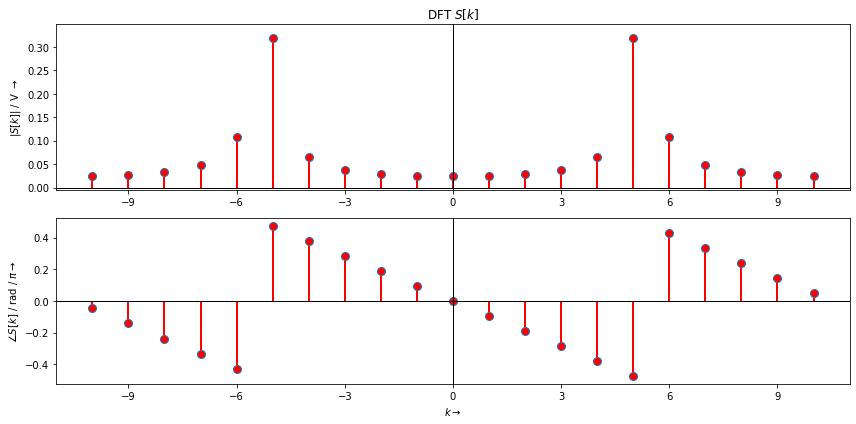

In [29]:
xn = xn[0:N] # Array auf Elemente 0 ... N-1 kürzen
Xn = fft(xn)/ N # Berechne DFT und skaliere mit 1/N
#print(len(xn), len(Xn))
Xn = fftshift(Xn) # schiebe DFT um -fs/2 zum Zentrieren um f = 0
for i in range(0,N):
# Setze Phase = 0 bei sehr kleinen Amplituden (unterdrücke numerisches Rauschen):
    if abs(Xn[i]/max(abs(Xn))) < 1.0e-10: Xn[i] = 0
xf = fftshift(fftfreq(len(xn),d=1.0/len(xn)))
#xf= fftshift(range(0,len(xn)))
print('xf = ', xf); print('xn = ', xn); print(Xn)
my_xlim = lim_eps(xf, 0.05)

fig2, (ax21, ax22) = plt.subplots(2, **figsize)
ml, sl, bl = ax21.stem(xf,abs(Xn), use_line_collection=True)
plt.setp(ml, 'markerfacecolor', 'r', 'markersize', 8) # marker
plt.setp(sl, 'color','r', 'linewidth', 2) # stemline
plt.setp(bl, 'linewidth', 0) # turn off baseline
ax21.set_ylabel(r'$|S[k]|$ / V $\rightarrow$' )
ax21.set_title(r'DFT $S[k]$')
ax21.set_xlim(my_xlim); ax21.set_ylim(lim_eps(abs(Xn), 0.1))
ax21.axhline(y=0, xmin = 0, xmax = 1, linewidth=1, color='k')
ax21.axvline(x=0, ymin = 0, ymax = 1, linewidth=1, color='k')
ax21.xaxis.set_major_locator(MaxNLocator(integer=True)) #enforce integer tick labels
#
ml, sl, bl = ax22.stem(xf,np.angle(Xn)/np.pi, use_line_collection=True)
plt.setp(ml, 'markerfacecolor', 'r', 'markersize', 8)
plt.setp(sl, 'color','r', 'linewidth', 2)
plt.setp(bl, 'linewidth', 0) # Grundlinie unterdrücken
ax22.set_xlabel(r'$k \rightarrow$')
ax22.set_ylabel(r'$ \angle S[k]$ / rad / $\pi \rightarrow$' )
ax22.set_xlim(my_xlim)
ax22.axhline(linewidth=1, color='k') # horizontale Linie bei 0
ax22.axvline(linewidth=1, color='k'); # vertikale Linie bei 0
ax22.xaxis.set_major_locator(MaxNLocator(integer=True)) #enforce integer tick labels
fig2.set_tight_layout(True)
#fig2.savefig(BASE_DIR + FILENAME + '_Xf_%sHz' %int(fs) + FMT) # uncomment to export figure